# Numerische Optimierungsverfahren – Zweidimensional

## Definition verschiedener Zielfunktionen

In [2]:
# Funktion 1 und ihr Gradient
def f1(x):
    return (x[0] - 2)**2 + (x[1] - 5)**2 - 3*np.cos(x[1])

def grad_f1(x):
    dfdx0 = 2 * (x[0] - 2)  # Ableitung nach x[0]
    dfdx1 = 2 * (x[1] - 5) + 3 * np.sin(x[1])  # Ableitung nach x[1]
    return np.array([dfdx0, dfdx1])

# Funktion 2 und ihr Gradient -- diese Funktion wird auch Rosenbrock Funktion genannt
a = 1 # Fester Parameter
b = 100 # Fester Parameter

def f2(x):
    return (a-x[0])**2+b*(x[1]-x[0]**2)**2

 
def grad_f2(x):
    dfdx0 =  2*(x[0]-a) - 4*b*x[0]*(x[1]-x[0]**2) # Ableitung nach x[0]
    dfdx1 =  2*b*(x[1]-x[0]**2) # Ableitung nach x[1]
    return np.array([dfdx0, dfdx1]) 

# Wähle eine Zielfunktion 
f=f2
grad_f=grad_f2

In [3]:
# Startwert 
start_x = np.array([2, -0.5])
stepsize = 0.0001
num_steps=1000

## Funktion zum Plotten der Funktion und der Iterationsschritte

Hier wird eine Funktion definiert, mit der wir uns die Iterationsschritte der Verfahren und den Funktionsgraphen ausgeben lassen können.

In [16]:
def plot_results(f,start_x,optimal_x,optimal_y):

    # Iterationsschritte Plotten
    x = np.linspace(-1.5, 2, 400) # für f2
    y = np.linspace(-0.5, 3, 400) # für f2
    #x = np.linspace(-1, 5, 400)  # für f1
    #y = np.linspace(0, 8.5, 400) # für f1
    X, Y = np.meshgrid(x, y)
    Z = f([X, Y])

    s1 = 22


    # Plot der Funktion
    fig = plt.figure(figsize=(9, 9))
    ax = fig.add_subplot(111, projection='3d')
    # Höhenlinien 
    ax.contour3D(X, Y, Z, levels=30, cmap="viridis", linestyles="solid", zorder=1) # Greys
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5,zorder=2) # Greys

    # Markiere den Startpunkt 
    ax.plot(start_x[0], start_x[1], f(start_x), 'v', markersize=12, label='Startwert', color='dimgray',  zorder=4)

    # Plotte die Iterationen
    ax.plot(iterations[:, 0], iterations[:, 1], f(iterations.T), 'o', markersize = 8, linewidth = 2, label='Iterationsschritte',  color='black', zorder=5)

    # Markiere den Endpunkt
    ax.plot(optimal_x[0], optimal_x[1], f(optimal_x), 'D', markersize=12, label='Berechnete Lösung', color='dimgray',zorder=5)

    # Achsenbeschriftungen
    ax.set_xlabel(r'$x_1$', fontsize=s1, labelpad=10)
    ax.set_ylabel(r'$x_2$', fontsize=s1, labelpad=5)
    ax.set_zlabel(r'$f(x_1, x_2)$', fontsize=s1, labelpad=12)
    # Adjusting the z-axis label orientation
    ax.zaxis.label.set_rotation(0)  
    ax.zaxis.set_label_coords(-0.1, 0.5)  

    ax.view_init(elev=30, azim=5)


    # Skalenwerte auf Achsen vergrößern
    plt.xticks(fontsize=s1)
    plt.yticks(fontsize=s1)
    ax.zaxis.set_tick_params(labelsize=s1)  
    plt.legend( prop={'size': s1}) # loc='upper right',

    # plt.savefig('../3d_gradientenverfahren.png', dpi=300, bbox_inches='tight')# pad_inches=3.82)
    return plt.show()

## Iterative Anwendung des Bergesteigerverfahrens für eindimensionale Probleme

In [26]:
def bergsteigerverfahren_2d(f, start_x, stepsize, num_steps, tol=1e-6):
    x = np.array(start_x, dtype=float)
    x_history = [x.copy()]
    y_history = [f(x)]

    for i in range(num_steps):
        improved = False

        # Optimierung in x1-Richtung
        neighbors_x1 = [
            x + np.array([-stepsize, 0]),
            x + np.array([stepsize, 0])
        ]
        best_x1 = min(neighbors_x1, key=lambda x: f(x))
        
        if f(best_x1) < f(x):
            x = best_x1
            improved = True

        # Optimierung in x2-Richtung
        neighbors_x2 = [
            x + np.array([0, -stepsize]),
            x + np.array([0, stepsize])
        ]
        best_x2 = min(neighbors_x2, key=lambda x: f(x))
                    
        if f(best_x2) < f(x):
            x = best_x2
            improved = True

        if not improved:
            break
            

        x_history.append(x.copy())
        y_history.append(f(x))
        
       # if i % 100 == 0:
        #    print(i, f(x))
    
    # Gib das Ergebnis aus
    print("Optimales x:", np.round(x,4))
    print("Minimalwert von f(x):", np.round(f(x),4))
    print("Anzahl Iterationsschritte:", len(np.array(x_history))-1)
    
    return x, f(x), np.array(x_history)

optimal_x, optimal_y, iterations = bergsteigerverfahren_2d(f, start_x, stepsize, num_steps)

Optimales x: [ 1.9 -0.4]
Minimalwert von f(x): 1608.82
Anzahl Iterationsschritte: 1000


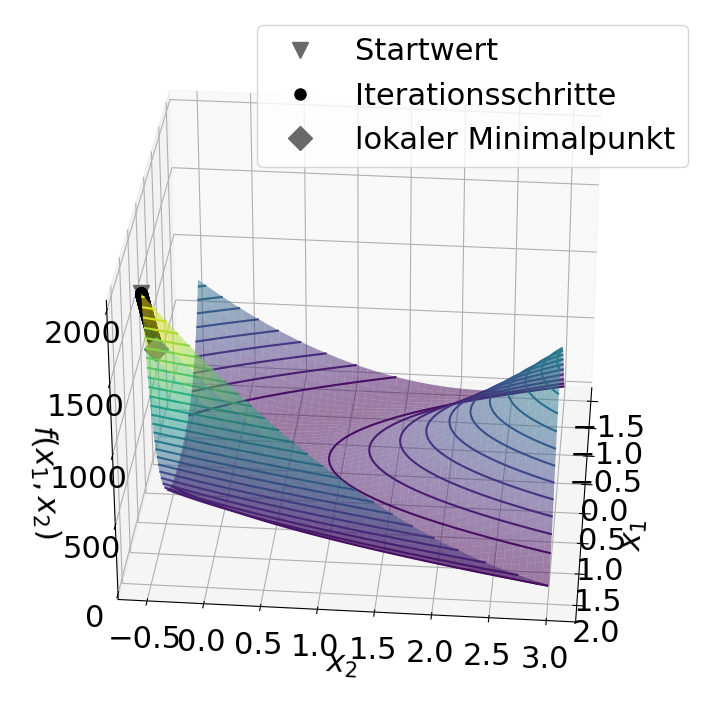

In [22]:
plot_results(f,start_x,optimal_x,optimal_y)

## Erweiterung des Bergesteigerverfahrens für zweidimensionale Probleme (8 Richtungen)

In [27]:
import numpy as np

def bergsteigerverfahren_8_directions(f, start_x, stepsize, num_steps, tol=1e-6):
    """
    Hill-Climbing-Algorithmus für 2D-Funktionen mit erweiterter Nachbarschaftssuche.
    
    Args:
        f: Zielfunktion (2D-Array -> float)
        start_x: Startpunkt als Liste oder Array
        stepsize: Schrittweite (alpha)
        num_steps: Maximale Iterationen
        
    Returns:
        x: Optimaler Punkt
        f(x): Minimaler Funktionswert
        np.array(x_history): Verlauf aller x-Werte
    """
    x = np.array(start_x, dtype=float)
    x_history = [x.copy()]
    y_history = [f(x)]

    for _ in range(num_steps):
        # Definieren aller möglichen Richtungen
        dirs = [
            np.array([stepsize, 0]),    # Rechts
            np.array([-stepsize, 0]),   # Links
            np.array([0, stepsize]),    # Oben
            np.array([0, -stepsize]),   # Unten
            np.array([stepsize/2, stepsize/2]),   # Diagonal rechts oben
            np.array([stepsize/2, -stepsize/2]),  # Diagonal rechts unten
            np.array([-stepsize/2, stepsize/2]),  # Diagonal links oben
            np.array([-stepsize/2, -stepsize/2])  # Diagonal links unten
        ]
        
        # Generiere alle Kandidatenpunkte
        candidates = [x + direction for direction in dirs] + [x.copy()]
        
        # Finde den Punkt mit dem kleinsten Funktionswert
        best_candidate = min(candidates, key=lambda p: f(p))
        
        # Abbruchbedingung bei fehlender Verbesserung
        if f(best_candidate) >= f(x):
            break
            
        x = best_candidate
        x_history.append(x.copy())
        y_history.append(f(x))

    # Ausgabe der Ergebnisse
    print("Optimales x:", np.round(x,4))
    print("Minimalwert von f(x):", np.round(f(x),4))
    print("Anzahl Iterationsschritte:", len(x_history)-1)  # -1 wegen Startpunkt
    
    return x, f(x), np.array(x_history)


In [28]:
optimal_x, optimal_y, iterations = bergsteigerverfahren_8_directions(f, start_x, stepsize, num_steps)


Optimales x: [ 1.9 -0.5]
Minimalwert von f(x): 1690.02
Anzahl Iterationsschritte: 1000


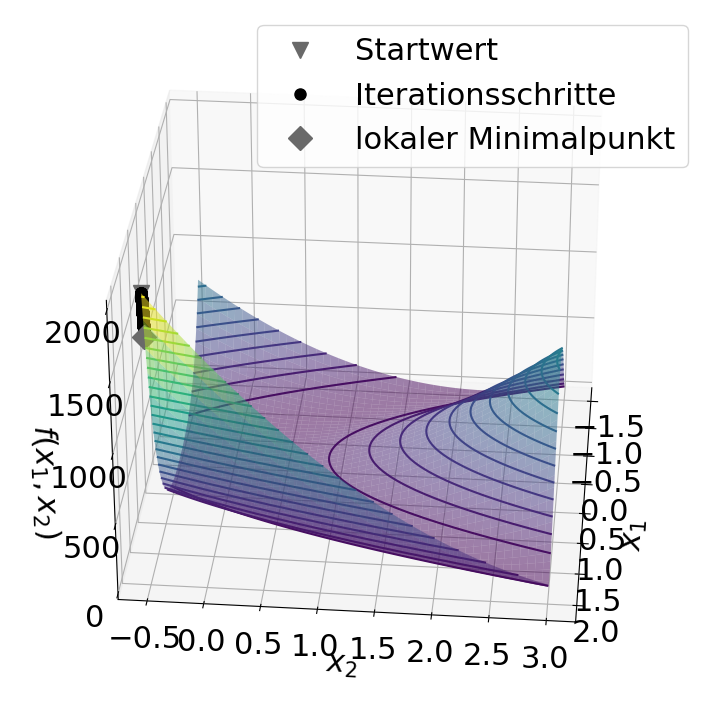

In [20]:
plot_results(f,start_x,optimal_x,optimal_y)

## Das Gradientenverfahren

Achtung: läuft nur durch wenn die Schrittweite ausreichend klein ist!

z.B. stepsize = 0.0001

In [30]:
# Definiere das Gradientenverfahren

def gradient_descent(f, grad_f, start_x, stepsize, num_steps, tol=1e-6):
    x = start_x
    iterations = [x]
    
    for i in range(num_steps):
        grad = grad_f(x)
        new_x = x - stepsize * grad
        
        iterations.append(new_x)
        
        # Abbruchbedingung, wenn die Änderung klein ist
        if np.linalg.norm(new_x - x) < tol:
            break
        
        if np.linalg.norm(f(new_x) - f(x)) < tol:
            break
        
        x = new_x
        
    
    # Gib das Ergebnis aus
    print("Optimales x:", np.round(x,4))
    print("Minimalwert von f(x):", np.round(f(x),4))
    print("Anzahl Iterationsschritte:", len(np.array(iterations)))   
    
    len(iterations)
    return np.array(iterations), x, f(x)

# Gradientenabstieg durchführen
iterations, optimal_x, optimal_y = gradient_descent(f, grad_f, start_x, stepsize, num_steps)

Optimales x: [0.5116 0.2593]
Minimalwert von f(x): 0.2391
Anzahl Iterationsschritte: 1001


### Plotten der Funktion und der Iterationsschritte
Die Iterationsschritte und den Funktionsgraphen werden im Folgenden grafisch dargestellt.

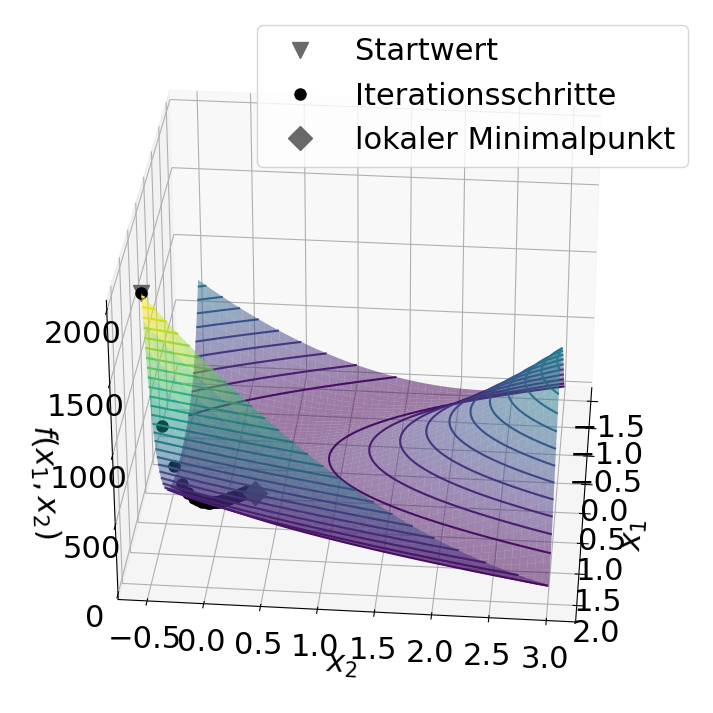

In [31]:
plot_results(f,start_x,optimal_x,optimal_y)